# Computergestützte Mathematik zur Analysis

Vorlesung vom 12.01.2023

&copy; 2023 Prof. Dr. Rüdiger W. Braun 

## Anmeldung zur Prüfung

Prüfungstermine

* 07.02.2023
* 28.03.2023

Die Anmeldung zur ersten Klausur ist seit einigen Tagen möglich. 

In [1]:
from sympy import *
init_printing()

# 3D-Plots mit `sympy`

In [2]:
x = S('x')
y = S('y')
f = -x**4/2 - x**2*y**2 - y**4/2 + x**3 - 3*x*y**2

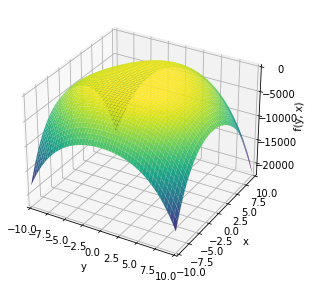

In [3]:
plotting.plot3d(f);

Hübsch, aber in dieser Form nutzlos

In [4]:
gr = Matrix([f]).jacobian([x,y])
gr

⎡     3      2        2      2       2                3⎤
⎣- 2⋅x  + 3⋅x  - 2⋅x⋅y  - 3⋅y   - 2⋅x ⋅y - 6⋅x⋅y - 2⋅y ⎦

In [5]:
krit = solve(gr)
krit

Was passiert dort?

# `numpy` und universal functions

In [6]:
import numpy as np

In [7]:
np.pi  # numpy

In [8]:
pi.n()  # sympy mit Numerik via mpmath

In [9]:
pi.n(n=42)

In [10]:
A1 = np.array([1.2,2,48])
A1

array([ 1.2,  2. , 48. ])

In [11]:
3*A1

array([  3.6,   6. , 144. ])

In [12]:
A1 + np.ones_like(A1)

array([ 2.2,  3. , 49. ])

sieht aus wie ein Vektor, hat aber andere Multiplikationsregeln

In [13]:
A1**2

array([1.440e+00, 4.000e+00, 2.304e+03])

In [14]:
S1 = Matrix([1.2, 2, 48])
S1

⎡1.2⎤
⎢   ⎥
⎢ 2 ⎥
⎢   ⎥
⎣48 ⎦

In [ ]:
#S1**2  # NonSquareMatrixError

In [15]:
M1 = np.array([A1, 2*A1, 3*A1])
M1

array([[  1.2,   2. ,  48. ],
       [  2.4,   4. ,  96. ],
       [  3.6,   6. , 144. ]])

In [16]:
M1**2

array([[1.4400e+00, 4.0000e+00, 2.3040e+03],
       [5.7600e+00, 1.6000e+01, 9.2160e+03],
       [1.2960e+01, 3.6000e+01, 2.0736e+04]])

In [17]:
M1 @ M1

array([[  179.04,   298.4 ,  7161.6 ],
       [  358.08,   596.8 , 14323.2 ],
       [  537.12,   895.2 , 21484.8 ]])

In [18]:
M1[0,0]**2 + M1[0,1]*M1[1,0] + M1[0,2]*M1[2,0]

# Broadcasting

In [19]:
N3 = np.zeros(shape=(3,3))
N3

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [20]:
N3 + 2

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [21]:
N3 +  2*np.eye(3)

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [22]:
N3 + A1

array([[ 1.2,  2. , 48. ],
       [ 1.2,  2. , 48. ],
       [ 1.2,  2. , 48. ]])

In [23]:
M1 = A1.reshape(3,1)
M1

array([[ 1.2],
       [ 2. ],
       [48. ]])

In [24]:
N3 + M1

array([[ 1.2,  1.2,  1.2],
       [ 2. ,  2. ,  2. ],
       [48. , 48. , 48. ]])

Broadcasting:  Wenn möglich, wird der kleinere Array durch Stapeln auf die Form des größeren gebracht, bevor eine punktweise Operation ausgeführt wird.

# Vordefinierte Arrays

In [25]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
xn = np.linspace(0, 10, 10)
xn

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [27]:
len(xn)

# universal functions

In [28]:
np.sin(xn)

array([ 0.        ,  0.8961922 ,  0.79522006, -0.19056796, -0.96431712,
       -0.66510151,  0.37415123,  0.99709789,  0.51060568, -0.54402111])

In [ ]:
#sin(xn)  TypeError

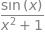

In [29]:
g = sin(x) / (1+x**2)
g

In [30]:
gn = lambdify(x, g)
gn

<function _lambdifygenerated(x)>

In [31]:
gn(xn)

array([ 0.        ,  0.40105839,  0.1339144 , -0.01573497, -0.0464662 ,
       -0.020873  ,  0.00823316,  0.0162146 ,  0.00638159, -0.00538635])

In [32]:
tn = np.linspace(0, 10, 1000)

In [35]:
%%timeit
[sin(tt)/(1+tt**2) for tt in tn]

33.4 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%timeit
gn(tn)

9.08 µs ± 142 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# `matplotlib`

In [37]:
from matplotlib import pyplot as plt

In [38]:
yn = np.sin(tn)/(1+tn**2)

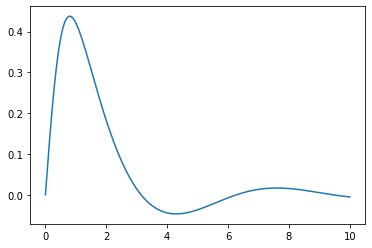

In [39]:
plt.plot(tn, yn);

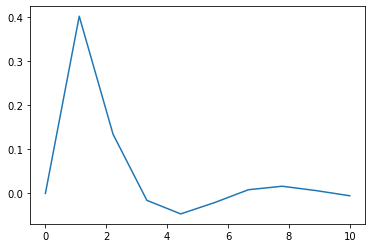

In [40]:
plt.plot(xn, np.sin(xn)/(1+xn**2));

`sympy` schätzt die Anzahl der notwendigen Stützstellen selber ab

`pyplot` tut das nicht

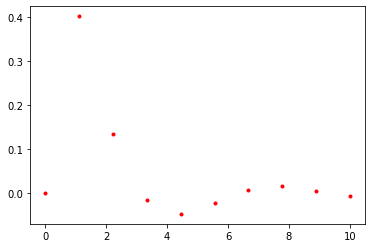

In [41]:
plt.plot(xn, np.sin(xn)/(1+xn**2), 'r.')

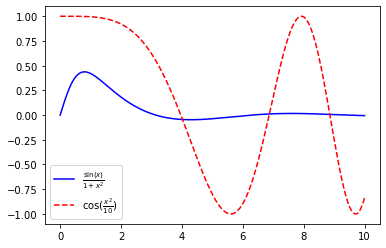

In [45]:
zn = np.cos(.1*tn**2)
plt.plot(tn, yn, 'b', label="$\\frac{\\sin(x)}{1+x^2}$")
plt.plot(tn, zn, 'r--', label="$\\cos(\\frac{x^2}{10})$")
plt.legend();

Farben als Kürzel  (Alternativen später)

|b   |g    |r  |c   |m      |y     |k    |w    |
|----|-----|---|----|-------|------|-----|-----|
|blue|green|red|cyan|magenta|yellow|black|white|

# 3D-Plots mit matplotlib

In [43]:
from mpl_toolkits.mplot3d import Axes3D


Der Import definiert einige Klassen um. `Axes3d` selbst brauchen wir gar nicht

In [46]:
xn = np.linspace(-3*np.pi, 3*np.pi, 500)
yn = np.linspace(-3*np.pi, 3*np.pi, 501)
X, Y = np.meshgrid(xn, yn)
X.shape

In [47]:
X[:5, :5]

array([[-9.42477796, -9.3870033 , -9.34922864, -9.31145398, -9.27367932],
       [-9.42477796, -9.3870033 , -9.34922864, -9.31145398, -9.27367932],
       [-9.42477796, -9.3870033 , -9.34922864, -9.31145398, -9.27367932],
       [-9.42477796, -9.3870033 , -9.34922864, -9.31145398, -9.27367932],
       [-9.42477796, -9.3870033 , -9.34922864, -9.31145398, -9.27367932]])

In [48]:
Y[:5, :5]

array([[-9.42477796, -9.42477796, -9.42477796, -9.42477796, -9.42477796],
       [-9.38707885, -9.38707885, -9.38707885, -9.38707885, -9.38707885],
       [-9.34937974, -9.34937974, -9.34937974, -9.34937974, -9.34937974],
       [-9.31168063, -9.31168063, -9.31168063, -9.31168063, -9.31168063],
       [-9.27398151, -9.27398151, -9.27398151, -9.27398151, -9.27398151]])

In [49]:
Z = np.cos(np.sqrt(X**2+Y**2))

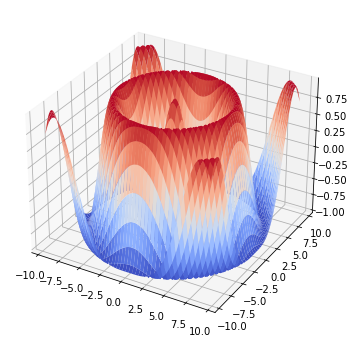

In [50]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
# subplot(123)  ist der dritte Subplot in einer 1x2-Matrix von Plots
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm);

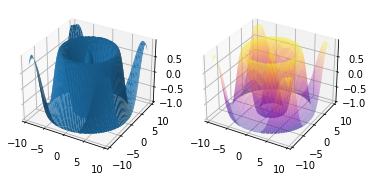

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap=plt.cm.plasma, alpha=.35)  # default ist viridis
plt.savefig('test.pdf')

Wenn's schnell gehen soll

In [52]:
xn = np.linspace(-3*np.pi, 3*np.pi, 200)
yn = np.linspace(-3*np.pi, 3*np.pi, 200)
X, Y = np.meshgrid(xn, yn)
Z = np.cos(np.sqrt(X**2+Y**2))

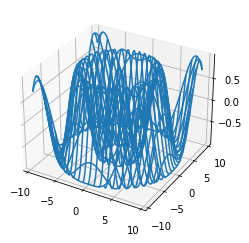

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10);

In [54]:
%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10);
# may or may not work

In [55]:
%matplotlib inline

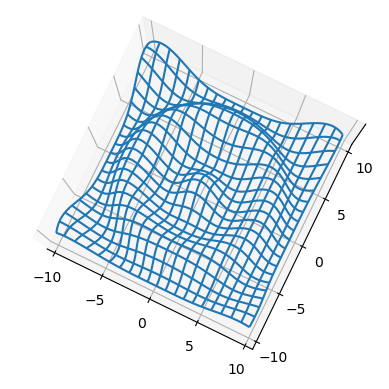

In [56]:
ax.view_init(85,-64);  # (hoehe, azimuth)
ax.set_zticks([])
fig

In [57]:
f

In [58]:
fn = lambdify((x,y), f)

In [59]:
xn = np.linspace(-10, 10, 400)
yn = np.linspace(-10, 10, 401)
X, Y = np.meshgrid(xn, yn)
Z = fn(X, Y)

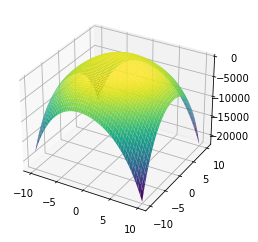

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis);

Dasselbe Bild wie oben

In [62]:
werte = []
for k in krit:
    werte.append(fn(k[x].n(), k[y].n()))
werte

In [63]:
import matplotlib.colors as colors

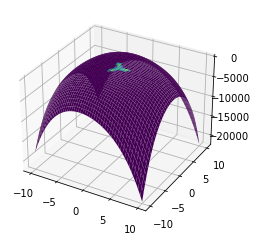

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis, vmin=-werte[0], vmax=werte[0]);

In [65]:
xn = np.linspace(-2, 2, 400)
yn = np.linspace(-2, 2, 401)
X, Y = np.meshgrid(xn, yn)
Z = fn(X, Y)

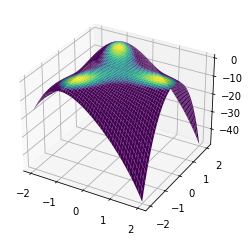

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis, vmin=-werte[0], vmax=werte[0]); 